<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_SelectionN1_N2_N3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/N1_N2_N3.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [47]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [49]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [50]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [52]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,1.105704
1,MedianF_Alpha_F4,144.263011
2,MeanF_Alpha_F4,1331.004149
3,Spectral Edge_Alpha_F4,1464.671035
4,PeakF_Alpha_F4,255.518984
...,...,...
70,MeanP_Gamma_O2,14.019644
71,MedianF_Gamma_O2,10.663855
72,MeanF_Gamma_O2,81.025007
73,Spectral Edge_Gamma_O2,45.223599


In [54]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_F4  1470.252150
3   Spectral Edge_Alpha_F4  1464.671035
8    Spectral Edge_Beta_F4  1463.183894
2           MeanF_Alpha_F4  1331.004149
28  Spectral Edge_Alpha_C4  1219.536126
27          MeanF_Alpha_C4  1113.361346
54          PeakF_Alpha_O2  1096.611354
33   Spectral Edge_Beta_C4  1025.307036
6          MedianF_Beta_F4   932.660437
59           PeakF_Beta_O2   852.816903


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_F4  1470.252150
3   Spectral Edge_Alpha_F4  1464.671035
8    Spectral Edge_Beta_F4  1463.183894
2           MeanF_Alpha_F4  1331.004149
28  Spectral Edge_Alpha_C4  1219.536126
27          MeanF_Alpha_C4  1113.361346
54          PeakF_Alpha_O2  1096.611354
33   Spectral Edge_Beta_C4  1025.307036
6          MedianF_Beta_F4   932.660437
59           PeakF_Beta_O2   852.816903


In [57]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01011418 0.00969197 0.02295073 0.02180945 0.00955213 0.00953591
 0.02464705 0.01415974 0.014184   0.01131443 0.01218715 0.02517797
 0.01335445 0.01053728 0.0093158  0.01290471 0.01154481 0.03403509
 0.01886038 0.00891552 0.00928959 0.01076064 0.00976098 0.00927439
 0.00695294 0.00959093 0.01041408 0.02200322 0.01909606 0.00859112
 0.00893222 0.0178205  0.0138736  0.01290134 0.00990985 0.01134062
 0.02087808 0.01225565 0.01163969 0.0104138  0.01469192 0.01209625
 0.03287574 0.02289267 0.00903383 0.00893028 0.01113656 0.01022816
 0.00849166 0.00663308 0.00897686 0.0152276  0.01132193 0.0112282
 0.00957576 0.00905079 0.0108337  0.01054216 0.01121717 0.00948602
 0.01074014 0.02339379 0.01372928 0.02261522 0.010126   0.01260937
 0.01159915 0.02948921 0.01630267 0.00835245 0.00901044 0.01104011
 0.01042029 0.00851643 0.00709303]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

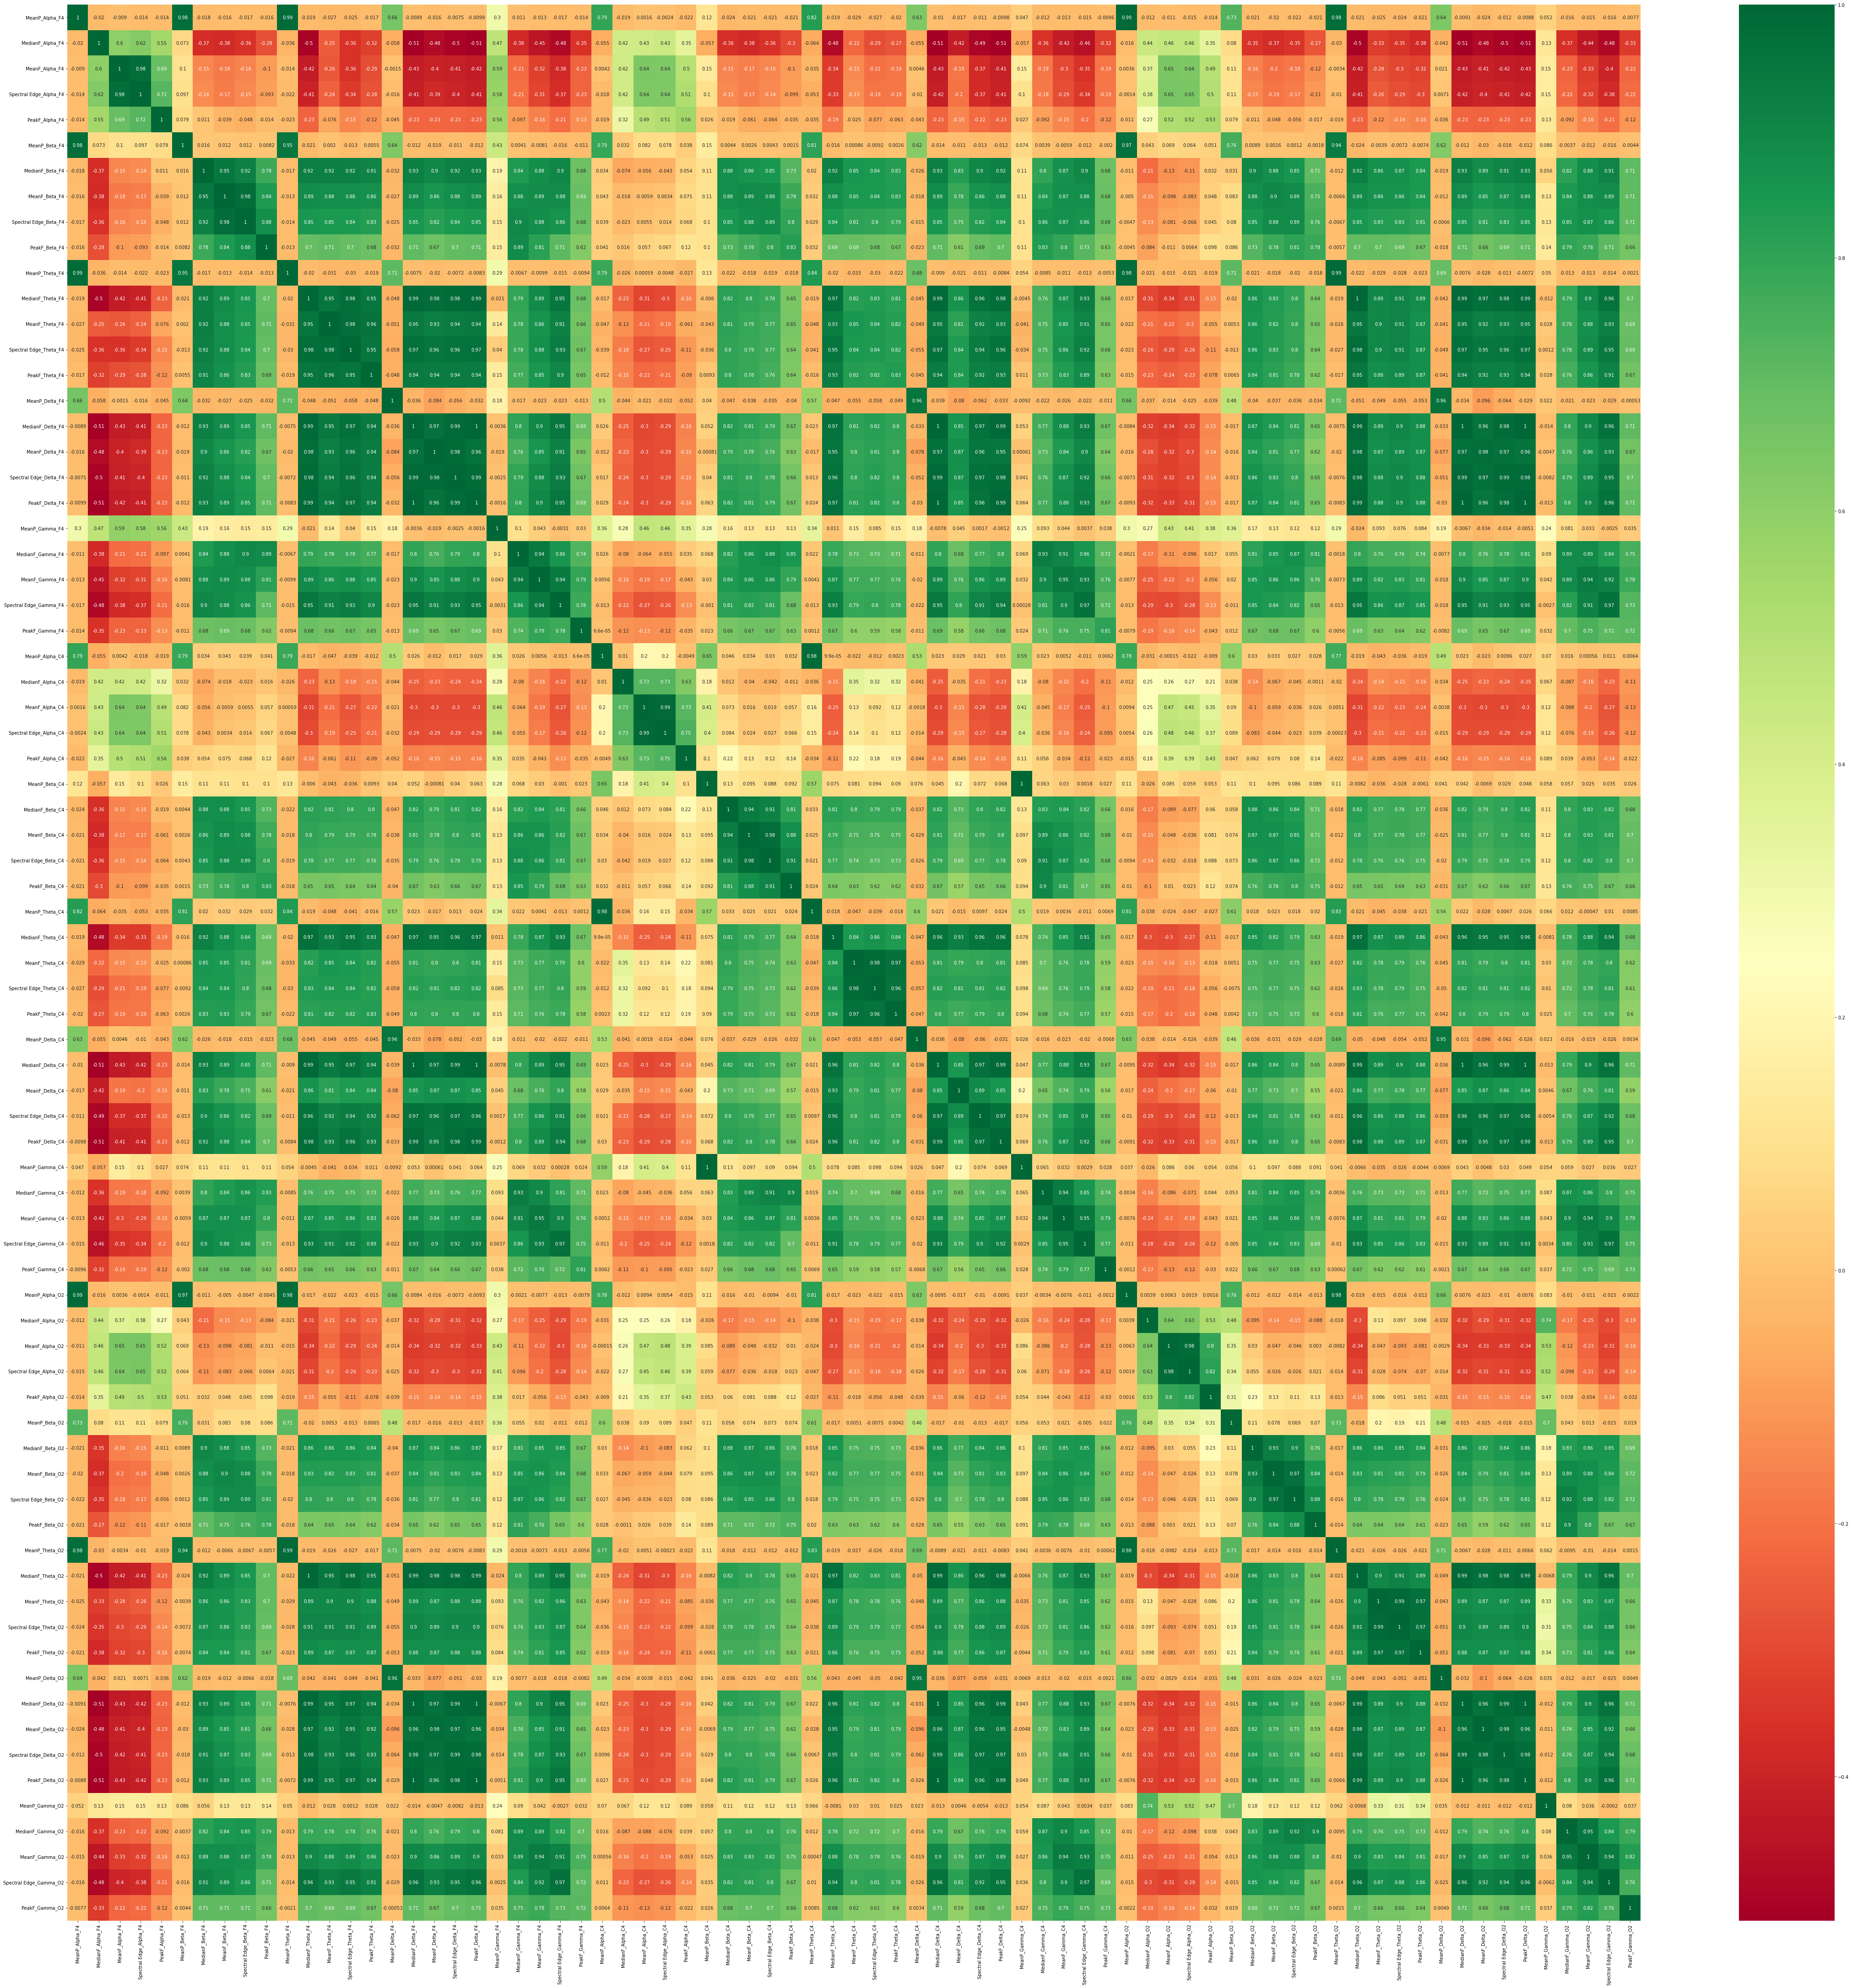

In [58]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation